# ニューラルネットワーク，その他教師あり学習
## 副専攻科目を履修する中で，課題として提出したコードを抜粋して集めました．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# ニューラルネットワークから深層学習（画像認識の例）

MNISTの手書き数字データのパターン認識を題材に、Kerasを使用してニューラルネットワーク（3層パーセプトロン）や深層学習（畳み込みニューラルネットワーク）を組んでみたコード。「Pythonで動かして学ぶ！あたらしい機械学習の教科書」のコードを参考にしています。

# 1-1　MNISTデータを読み込む

In [ ]:
# MNISTのデータを読み込む（Kerasで読み込めるようになっている）
from keras.datasets import mnist

# 学習データ60000個、テストデータ10000個が格納される
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# データを表示してみる
print("x_train[0]:\n",x_train[0])  # 入力（画像データ）：28×28の行列、それぞれ0～255の値をとる
print("y_train[0]:\n",y_train[0])  # 出力（クラスラベル）：0～9の値


x_train[0]:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 2

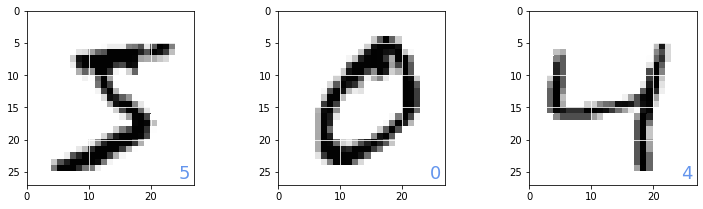

In [ ]:
# データを可視化
plt.ﬁgure(1, ﬁgsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()

# 最初の3つのデータを可視化
for id in range(3):
    plt.subplot(1, 3, id + 1)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],
             color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')

plt.show()

In [ ]:
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)  # 一つひとつのデータについて、28×28＝784の長さのベクトルに置き換える
x_train = x_train.astype('float32')   # もとのデータがint型なので、float型に変換
x_train = x_train / 255               # 0～1の実数値に変換
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)  # 1-of-K符号に置き換える

# 以下、テストデータについても同様の変換
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

# データを表示してみる
print("x_train[0]:\n",x_train[0])  # 入力（画像データ）
print("y_train[0]:\n",y_train[0])  # 出力（クラスラベル）

x_train[0]:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.       

# 1-2　3層パーセプトロンで分類モデルを作る

活性化関数にシグモイド関数を使う場合

In [ ]:
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()  # 多層ネットワークのモデルを作成
model.add(Dense(16, input_dim=784, activation='sigmoid'))  # 784次元入力のユニットを16個持つ層（中間層）を作成（活性化関数はシグモイド関数）
model.add(Dense(10, activation='softmax'))  # 10個のユニットを持つ層（出力層）を生成（ソフトマックス関数）
model.compile(loss='categorical_crossentropy',         # 目的関数にクロスエントロピー、
              optimizer=Adam(), metrics=['accuracy'])  # 最適化アルゴリズムにAdam、評価指標にaccuracyを設定

In [ ]:
import time

startTime = time.time()

history = model.fit(x_train, y_train,
                    epochs=10,        # エポック数（学習データをすべて使ってパラメータ更新するのを1エポックとするときの、エポックの回数）
                    batch_size=1000,  # バッチサイズ（確率的勾配法の1回の更新に使うデータサイズ：この数のデータセットから勾配が計算される。今回は学習データが60000なので、1エポックで60回のパラメータ更新が行われることになる）
                    verbose=1, validation_data=(x_test, y_test))   # verbose=1により、エポックごとの学習の評価値が表示される
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 4s 31ms/step - loss: 2.0116 - accuracy: 0.3992 - val_loss: 1.7282 - val_accuracy: 0.5436
Epoch 2/10
60/60 [==============================] - 1s 18ms/step - loss: 1.5622 - accuracy: 0.6525 - val_loss: 1.3823 - val_accuracy: 0.7509
Epoch 3/10
60/60 [==============================] - 1s 16ms/step - loss: 1.2668 - accuracy: 0.7819 - val_loss: 1.1303 - val_accuracy: 0.8262
Epoch 4/10
60/60 [==============================] - 1s 12ms/step - loss: 1.0509 - accuracy: 0.8289 - val_loss: 0.9481 - val_accuracy: 0.8521
Epoch 5/10
60/60 [==============================] - 1s 17ms/step - loss: 0.8941 - accuracy: 0.8479 - val_loss: 0.8149 - val_accuracy: 0.8670
Epoch 6/10
60/60 [==============================] - 1s 13ms/step - loss: 0.7782 - accuracy: 0.8622 - val_loss: 0.7160 - val_accuracy: 0.8772
Epoch 7/10
60/60 [==============================] - 1s 13ms/step - loss: 0.6909 - accuracy: 0.8711 - val_loss: 0.6410 - val_accuracy: 0.8846
Epoch 8/10
60

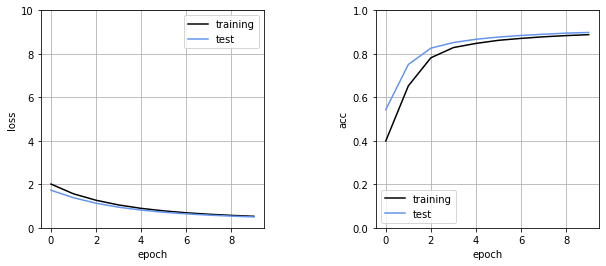

In [ ]:
# 誤差・正答率の推移を表示

plt.ﬁgure(1, ﬁgsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', 
color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='training', color='black')
plt.plot(history.history['val_accuracy'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

313/313 [==============================] - 1s 3ms/step


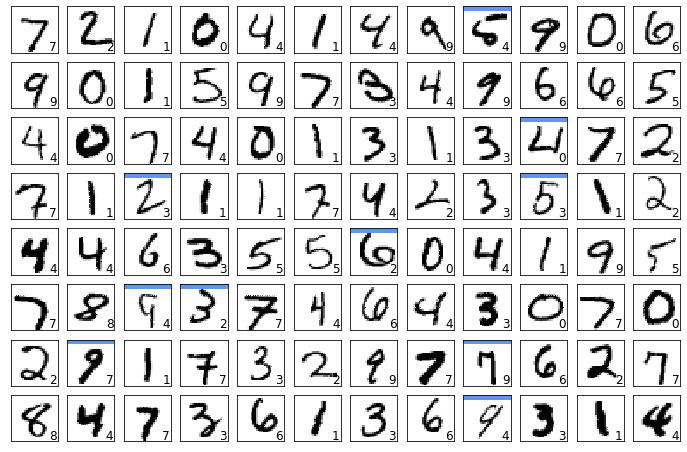

In [ ]:
# 予測（分類）結果を可視化する関数を定義
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.ﬁgure(2, ﬁgsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

# 表示
show_prediction()
plt.show()

活性化関数にReLu関数を使う場合

In [ ]:
# 活性化関数にReLuを使う場合。それ以外は上と同じ

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu'))   # ReLu関数を指定
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train,  batch_size=1000, epochs=10,
                    verbose=1,  validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
60/60 [==============================] - 2s 18ms/step - loss: 1.5986 - accuracy: 0.4970 - val_loss: 0.9588 - val_accuracy: 0.7829
Epoch 2/10
60/60 [==============================] - 1s 11ms/step - loss: 0.6836 - accuracy: 0.8477 - val_loss: 0.4873 - val_accuracy: 0.8875
Epoch 3/10
60/60 [==============================] - 1s 13ms/step - loss: 0.4351 - accuracy: 0.8902 - val_loss: 0.3704 - val_accuracy: 0.9070
Epoch 4/10
60/60 [==============================] - 1s 13ms/step - loss: 0.3553 - accuracy: 0.9064 - val_loss: 0.3201 - val_accuracy: 0.9143
Epoch 5/10
60/60 [==============================] - 1s 14ms/step - loss: 0.3157 - accuracy: 0.9140 - val_loss: 0.2928 - val_accuracy: 0.9192
Epoch 6/10
60/60 [==============================] - 1s 12ms/step - loss: 0.2917 - accuracy: 0.9201 - val_loss: 0.2755 - val_accuracy: 0.9216
Epoch 7/10
60/60 [==============================] - 1s 12ms/step - loss: 0.2752 - accuracy: 0.9243 - val_loss: 0.2652 - val_accuracy: 0.9226
Epoch 8/10
60

313/313 [==============================] - 0s 1ms/step


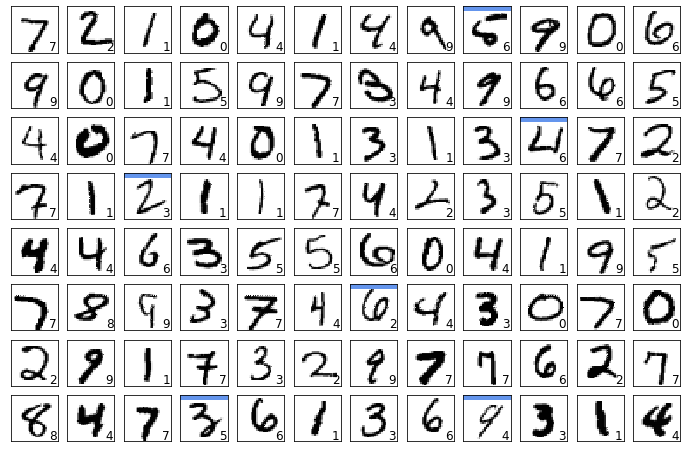

In [ ]:
# 分類結果の表示
show_prediction()
plt.show()

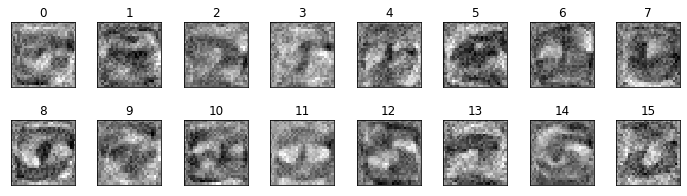

In [ ]:
# 中間層の重みの視覚化
w = model.layers[0].get_weights()[0]
plt.ﬁgure(1, ﬁgsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

# 1-3　畳み込みニューラルネットワーク（CNN）を実装する

In [ ]:
# データをいったん消去
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# データを読み込み直す
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

空間フィルターを用意する

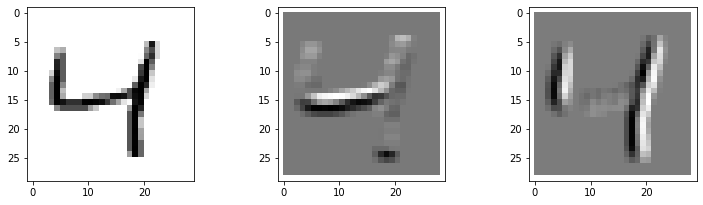

In [ ]:
# 空間フィルターの処理
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myﬁl1 = np.array([[1, 1, 1], 
                  [1, 1, 1],
                  [-2, -2, -2]], dtype=ﬂoat)  # 横のエッジを強調するフィルター
myﬁl2 = np.array([[-2, 1, 1], 
                  [-2, 1, 1], 
                  [-2, 1, 1]], dtype=ﬂoat)  # 縦のエッジを強調するフィルター

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# フィルター処理
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = \
             np.dot(img_part.reshape(-1), myﬁl1.reshape(-1))
        out_img2[ih + 1, iw + 1] = \
             np.dot(img_part.reshape(-1), myﬁl2.reshape(-1))
            
# 表示
plt.ﬁgure(1, ﬁgsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

CNNを実装する

In [ ]:
# CNNの実装

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()

# コンボリューション（畳み込み）層の追加
model.add(Conv2D(8, (3, 3),         # 3×3のフィルターを8枚使う
          padding='same',           # 出力サイズが変わらないようにパディングを使う
          input_shape=(28, 28, 1),  # 入力画像のサイズ（最後の1は白黒を表わす。カラーの場合は3）
          activation='relu'))       # フィルターをかけたあとの画像にReLu関数をかける

model.add(Flatten())                # コンボリューション層の出力は4次元（バッチ数、フィルター数、出力画像の縦幅、出力画像の横幅）なので、
                                    # 次の層に入れるために、2次元（バッチ数、フィルター数×出力画像の縦幅×出力画像の横幅）にする

model.add(Dense(10, activation='softmax'))  # 出力層を追加

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

startTime = time.time()

history = model.fit(x_train, y_train, batch_size=200, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
300/300 [==============================] - 14s 46ms/step - loss: 0.3925 - accuracy: 0.8950 - val_loss: 0.2087 - val_accuracy: 0.9427
Epoch 2/10
300/300 [==============================] - 13s 43ms/step - loss: 0.1761 - accuracy: 0.9503 - val_loss: 0.1372 - val_accuracy: 0.9638
Epoch 3/10
300/300 [==============================] - 13s 43ms/step - loss: 0.1195 - accuracy: 0.9667 - val_loss: 0.1033 - val_accuracy: 0.9712
Epoch 4/10
300/300 [==============================] - 13s 42ms/step - loss: 0.0915 - accuracy: 0.9745 - val_loss: 0.0866 - val_accuracy: 0.9741
Epoch 5/10
300/300 [==============================] - 15s 50ms/step - loss: 0.0739 - accuracy: 0.9793 - val_loss: 0.0737 - val_accuracy: 0.9777
Epoch 6/10
300/300 [==============================] - 13s 43ms/step - loss: 0.0631 - accuracy: 0.9820 - val_loss: 0.0694 - val_accuracy: 0.9779
Epoch 7/10
300/300 [==============================] - 14s 47ms/step - loss: 0.0556 - accuracy: 0.9846 - val_loss: 0.0684 - val_accuracy:

313/313 [==============================] - 1s 4ms/step


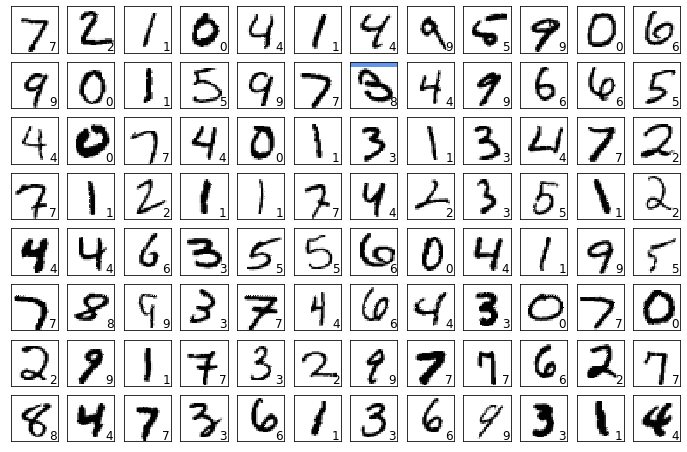

In [ ]:
# 予測（分類）結果を可視化する関数を定義（上のものと同じ）
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.ﬁgure(2, ﬁgsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

# 表示
show_prediction()
plt.show()

学習で獲得した8枚のフィルターを見てみる

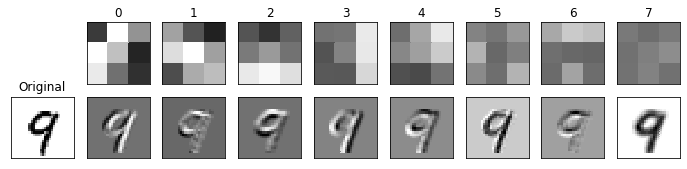

In [ ]:
# 学習で獲得した8枚のフィルターを表示
plt.ﬁgure(1, ﬁgsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")

# x_testの13番目の画像（「9」の画像）にフィルタをかけた例も表示
plt.title("Original")
w = model.layers[0].get_weights()[0]
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # フィルター処理
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
                        np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

CNNにプーリングとドロップアウトを取り入れ、全7層のCNNを実装してみる

In [ ]:
###  このセルの実行は10分以上かかるかも！  ###

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()

model.add(Conv2D(16, (3, 3), 
          input_shape=(28, 28, 1), activation='relu'))  # 1層目：畳み込み層

model.add(Conv2D(32, (3, 3), activation='relu'))        # 2層目：畳み込み層

model.add(MaxPooling2D(pool_size=(2, 2)))               # 3層目：プーリング層

model.add(Conv2D(64, (3, 3), activation='relu'))        # 4層目：畳み込み層

model.add(MaxPooling2D(pool_size=(2, 2)))               # 5層目：プーリング層
model.add(Dropout(0.25))                                # ドロップアウト（25%のニューロンを残す）
model.add(Flatten())

model.add(Dense(128, activation='relu'))                # 6層目：全結合層
model.add(Dropout(0.25))                                # ドロップアウト（25%のニューロンを残す）

model.add(Dense(num_classes, activation='softmax'))     # 7層目（出力層）：全結合層

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

startTime = time.time()

history = model.ﬁt(x_train, y_train, batch_size=200, epochs=10,
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Epoch 1/10
300/300 [==============================] - 78s 257ms/step - loss: 0.2866 - accuracy: 0.9095 - val_loss: 0.0569 - val_accuracy: 0.9811
Epoch 2/10
300/300 [==============================] - 77s 257ms/step - loss: 0.0710 - accuracy: 0.9784 - val_loss: 0.0381 - val_accuracy: 0.9877
Epoch 3/10
300/300 [==============================] - 77s 256ms/step - loss: 0.0515 - accuracy: 0.9845 - val_loss: 0.0287 - val_accuracy: 0.9907
Epoch 4/10
300/300 [==============================] - 77s 256ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0263 - val_accuracy: 0.9915
Epoch 5/10
300/300 [==============================] - 77s 256ms/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0260 - val_accuracy: 0.9911
Epoch 6/10
300/300 [==============================] - 77s 255ms/step - loss: 0.0290 - accuracy: 0.9907 - val_loss: 0.0204 - val_accuracy: 0.9929
Epoch 7/10
300/300 [==============================] - 77s 256ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0210 - val_ac

313/313 [==============================] - 4s 13ms/step


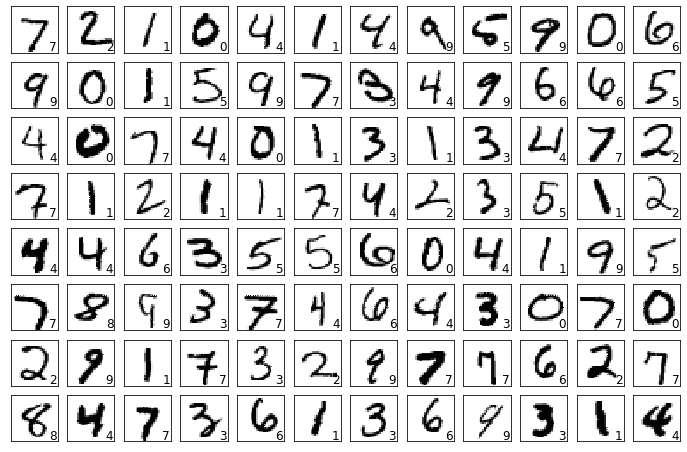

In [ ]:
# 予測（分類）結果を可視化する関数を定義（上のものと同じ）
def show_prediction():
    n_show = 96
    y = model.predict(x_test)
    plt.ﬁgure(2, ﬁgsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")

# 表示
show_prediction()
plt.show()

# 2　教師あり学習の補足(1)：正則化

# 2-1　分類モデルにおける正則化（ロジスティック回帰の例）

Credit Cardのデータで説明．まずデータを読み込んで前処理

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

%matplotlib inline
import matplotlib.pyplot as plt  # グラフ作成


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
feature_names = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'class']

df = pd.read_csv(s,header=None,names=feature_names,na_values = ['?'], encoding='utf-8')
df_x = df.drop('class', axis=1) # class（目的変数）の列を削除
df_y = df['class']
# df.info()  # データのメタ情報表示
num_cols = ['A02', 'A03', 'A08', 'A11','A14', 'A15']  # 数値変数の列のリスト
cat_cols = ['A01', 'A04', 'A05', 'A06', 'A07', 'A09', 'A10','A12', 'A13']  # カテゴリ変数の列のリスト

# 学習用のデータとテスト用のデータに分割する
from sklearn.model_selection import train_test_split

# train_test_split関数を用いてhold-out法で分割する
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y,
                                                    test_size=0.25, # 25%をテストデータにする
                                                    random_state=777,
                                                    shuffle=True)

le = LabelEncoder()
le.fit(train_y)
train_y = le.transform(train_y)
test_y = le.transform(test_y)

# 欠損値を処理する関数を作成
def impute():
    # train_xにおいて、欠損値（nan）の代わりに埋める値を用意
    train_x_mean = train_x[num_cols].mean()  # 数値変数は欠損値以外の値の平均（あくまで例です。これ以外が適切な場合もあるでしょう）
    train_x_mode = train_x[cat_cols].mode()  # カテゴリ変数は欠損値以外の値の最頻値（あくまで例です。これ以外が適切な場合もあるでしょう）

    # 数値変数は欠損値を平均値で置き換え
    train_x[num_cols] = train_x[num_cols].fillna(train_x_mean)
    test_x[num_cols] = test_x[num_cols].fillna(train_x_mean)

    # カテゴリ変数は欠損値を最頻値で置き換え
    for i in cat_cols:
      train_x[i] = train_x[i].fillna(train_x[i].mode()[0])
      test_x[i] = test_x[i].fillna(train_x[i].mode()[0])

    return train_x, test_x

# 学習データをもとにして、連続変数の特徴量を標準化して返す関数
def scale_x_for_num_cols_SS():

    scaler = StandardScaler()   # StandardScalerを用意
    scaler.fit(train_x[num_cols])

    # 各列のデータを変換
    train_x[num_cols] = scaler.transform(train_x[num_cols])  # scalerをtrain_xの数値変数の列すべてに適用してデータを変換する
    test_x[num_cols] = scaler.transform(test_x[num_cols])  # scalerをtest_xの数値変数の列すべてに適用してデータを変換する

    return train_x, test_x

# 学習データをもとにして、カテゴリ変数の特徴量をラベルエンコーダで変換して返す関数
def scale_x_for_cat_cols_LE():

    # それぞれのカテゴリ変数にlabel encodingを適用する
    scaler = LabelEncoder()

    for c in cat_cols:
        scaler.fit(train_x[c])
        train_x[c] = scaler.transform(train_x[c])
        test_x[c] = scaler.transform(test_x[c])

    return train_x, test_x

# 評価指標の計算
def showMetrics():
    cm = metrics.confusion_matrix(test_y, pred_y) # 混同行列
    acc = metrics.accuracy_score(test_y, pred_y) # Accuracy
    cr = metrics.classification_report(test_y, pred_y) # 各種評価指標をまとめて表示

    print('Confusion matrix:\n', cm)
    print('Accuracy:', acc)
    print('Classification Report:\n', cr)

# 欠損値を処理する
train_x, test_x = impute()

# 数値変数の変換
train_x, test_x = scale_x_for_num_cols_SS()   # 標準化

# カテゴリ変数の変換
train_x, test_x = scale_x_for_cat_cols_LE()   # ラベルエンコーダで変換

scikit-learnのLogisticRegressionでは，パラメータCが正則化パラメータ．
Cを「**小さくするほうが正則化が強くなる**」ので注意．

In [ ]:
from sklearn.linear_model import LogisticRegression

C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

print("重みベクトルは以下の説明変数にそれぞれ対応")
print(feature_names[:15])

np.set_printoptions(precision=2,suppress=True)

print("\n■L1正則化")
for c in C:
    lr = LogisticRegression(penalty='l1',  # L1正則化（Lasso）
                            C=c,
                            solver='liblinear')
    lr.fit(train_x, train_y)

    print('\nC:', c)
    print('Training accuracy:', lr.score(train_x, train_y))
    print('Test accuracy:', lr.score(test_x, test_y))
    print('切片:', lr.intercept_)
    print('重み:\n',lr.coef_)

print("\n\n■L2正則化")
for c in C:
    lr = LogisticRegression(penalty='l2',  # L2正則化（リッジ回帰）
                            C=c,
                            solver='liblinear')
    lr.fit(train_x, train_y)

    print('\nC:', c)
    print('Training accuracy:', lr.score(train_x, train_y))
    print('Test accuracy:', lr.score(test_x, test_y))
    print('切片:', lr.intercept_)
    print('重み:\n',lr.coef_)

重みベクトルは以下の説明変数にそれぞれ対応
['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15']

■L1正則化

C: 0.0001
Training accuracy: 0.4584139264990329
Test accuracy: 0.4046242774566474
切片: [0.]
重み:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

C: 0.001
Training accuracy: 0.4584139264990329
Test accuracy: 0.4046242774566474
切片: [0.]
重み:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

C: 0.01
Training accuracy: 0.4584139264990329
Test accuracy: 0.4046242774566474
切片: [0.]
重み:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

C: 0.1
Training accuracy: 0.8568665377176016
Test accuracy: 0.861271676300578
切片: [0.]
重み:
 [[ 0.    0.    0.    0.85  0.    0.    0.05 -0.1  -2.38  0.   -0.64  0.
   0.    0.   -0.33]]

C: 1
Training accuracy: 0.8665377176015474
Test accuracy: 0.8497109826589595
切片: [0.15]
重み:
 [[ 0.    0.08  0.19  1.74 -0.52 -0.02 -0.02 -0.25 -3.22 -0.33 -0.6   0.32
  -0.24  0.14 -2.12]]

C: 10
Training accuracy: 0.8665377176015474
Test ac

# 2-2　回帰モデルにおける正則化（線形回帰モデルの例）

scikit-learnのRidgeでリッジ回帰（L2正則化），LassoでLasso回帰（L1正則化）を行った．パラメータalphaが正則化パラメータ．
ロジスティック回帰のパラメータCとは逆に，alphaを「**大きくするほうが正則化が強くなる**」ので注意する．

In [ ]:
# データのパスとなるURL
s_reg = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# 列（特徴量）の名前
feature_names_reg = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

# CSVデータを読み込む
df_reg = pd.read_csv(s_reg, header=None, names=feature_names_reg, encoding='utf-8')
df_reg = df_reg.drop('class', axis=1) # classの列を削除

# alcohol列を目的変数とする
df_reg_x = df_reg.drop('alcohol', axis=1) 
df_reg_y = df_reg['alcohol']

# 学習用のデータとテスト用のデータに分割する
from sklearn.model_selection import train_test_split

# train_test_split関数を用いてhold-out法で分割する
train_reg_x, test_reg_x, train_reg_y, test_reg_y = train_test_split(df_reg_x, df_reg_y,
                                                                    test_size=0.25, # 25%をテストデータにする
                                                                    random_state=777,
                                                                    shuffle=True)

# scikit-learnのLinearRegressionで線形回帰
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression()
model_reg.fit(train_reg_x, train_reg_y)

# 得られたモデルのパラメータを表示
print("通常の線形回帰")
print("係数：", model_reg.coef_)
print("切片：", model_reg.intercept_)
print("決定係数:", model_reg.score(test_reg_x, test_reg_y))
#print("w0={0:.3f}, w1={1:.3f}".format(model.coef_[0], model.intercept_))


Alpha = [0.01, 0.1, 1, 10, 100, 1000]

# scikit-learnのRidgeでリッジ回帰（L2正則化）
from sklearn.linear_model import Ridge

print("\nリッジ回帰（L2正則化）")
for alpha in Alpha:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_reg_x, train_reg_y)
    # 得られたモデルのパラメータを表示
    print("\nalpha=",alpha)
    print("係数：", ridge.coef_)
    print("切片：", ridge.intercept_)
    print("決定係数:", ridge.score(test_reg_x, test_reg_y))


# scikit-learnのLassoでLasso回帰（L1正則化）
from sklearn.linear_model import Lasso

print("\nLasso回帰（L1正則化）")
for alpha in Alpha:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_reg_x, train_reg_y)
    # 得られたモデルのパラメータを表示
    print("\nalpha=",alpha)
    print("係数：", lasso.coef_)
    print("切片：", lasso.intercept_)
    print("決定係数:", lasso.score(test_reg_x, test_reg_y))


通常の線形回帰
係数： [ 0.13  0.23 -0.05  0.    0.09  0.01 -0.18 -0.2   0.17  0.21  0.14  0.  ]
切片： 11.038524793915268
決定係数: 0.5543305088997024

リッジ回帰（L2正則化）

alpha= 0.01
係数： [ 0.13  0.23 -0.05  0.    0.09  0.01 -0.17 -0.2   0.17  0.21  0.14  0.  ]
切片： 11.039122228794573
決定係数: 0.5543562196044758

alpha= 0.1
係数： [ 0.13  0.22 -0.05  0.    0.09  0.02 -0.16 -0.19  0.17  0.2   0.14  0.  ]
切片： 11.044572778761905
決定係数: 0.5545806664195696

alpha= 1
係数： [ 0.13  0.19 -0.05  0.    0.08  0.03 -0.08 -0.19  0.16  0.15  0.13  0.  ]
切片： 11.097453067759254
決定係数: 0.556426885457189

alpha= 10
係数： [ 0.11  0.08 -0.04  0.    0.06  0.04 -0.01 -0.14  0.15  0.04  0.09  0.  ]
切片： 11.318118640871214
決定係数: 0.5637508559651305

alpha= 100
係数： [ 0.07  0.02 -0.03  0.    0.02  0.02 -0.   -0.03  0.12 -0.    0.02  0.  ]
切片： 11.513174084667803
決定係数: 0.5591443302512519

alpha= 1000
係数： [ 0.02  0.   -0.01  0.    0.   -0.    0.   -0.    0.05 -0.   -0.    0.  ]
切片： 11.325859590395016
決定係数: 0.4830371713262339

Lasso回帰（L1正則化）

alpha= 0.

ガウス基底関数による線形回帰（RBFネットワーク）で最小二乗法に正則化を入れる

In [ ]:
# このセルはデータを発生させるための関数定義

#真の関数を定義
def y_val(functype, X):

    # 直線
    if functype == 1:
        Y = 50 + 45 * X
        #Y = -20 + 3 * X

    # 指数関数
    elif functype == 2:
         Y = 110 - 30 * np.exp(-1.2 * X)

    # sin関数
    elif functype == 3:
        Y = 50 + 50 * np.sin(0.2 + 1.1 * np.pi * X)

    # 直線とsin関数の重ね合わせ
    elif functype == 4:
        Y = 50 + 3 * X + 45 * np.sin(0.2 + 1.1 * np.pi * X) + 15 * np.sin(0.4 + 3 * np.pi * X)
    
    else:
        Y = X
        print("functype指定エラー（1～3の整数を入力してください）")

    return Y

# グラフを描く関数
def plotdata(X, Y, xt, yt):

    plt.figure(figsize=(6, 5))  # プロットエリアのサイズ

    # データのプロット
    plt.plot(X, Y, marker='o', linestyle='None', 
            markeredgecolor='black', color='cornflowerblue')

    # 真の関数のプロット
    plt.plot(xt, yt, color=(0.5, 0.5, 0.5), linewidth=1)

    plt.xlim(X_min, X_max)  # xの範囲指定
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)  # グリッドを表示

    plt.show()  # グラフ表示


# データを生成する関数
def create_data(functype, n, X_min, X_max, sigma):
    # 説明変数（入力）のデータをX_n個発生させる（[10, 40]の範囲）
    X = X_min + (X_max - X_min) * np.random.rand(n)

    # Xを入力したときの目的変数（出力）の値を計算してYに入れる
    Y = y_val(functype, X)

    # 目的変数にノイズ（観測雑音）を加える（平均0, 標準偏差sigmaの正規分布）
    Y += np.random.normal(loc=0, scale=sigma, size=n) 

    # 真の関数
    range = X_max - X_min
    xt = np.linspace(X_min - 0.1*range, X_max + 0.1*range, 100)
    yt = y_val(functype, xt)

    # データの確認
    #print(X)
    #print(Y)

    plotdata(X, Y, xt, yt)

    return X, Y, xt, yt

In [ ]:
# このセルはガウス基底関数による線形回帰モデル（RBFネットワーク）の計算および学習のための関数定義

# ガウス関数
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))

# ガウス基底関数による線形回帰モデル（RBFネットワーク）の出力を返す関数
def gauss_lr_output(w, x):
    m = len(w) - 1
    mu = np.linspace(X_min, X_max, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)     # x と同じサイズで要素が 0 の行列 y を作成
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

# MSEを計算する関数
def calc_mse(y, y_pred):
    mse = np.mean((y - y_pred)**2)
    return mse

# ガウス基底関数による線形回帰モデル（RBFネットワーク）解析的に解いて重みベクトルを得る関数（正則化最小二乗法バージョン）
def fit_l2_gauss_func(x, t, m, alpha):
    mu = np.linspace(X_min, X_max, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)

    psi_T = np.transpose(psi)
    
    b = np.linalg.inv(psi_T.dot(psi) + alpha * np.identity(m+1))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

# グラフ描画用：ガウス基底関数による線形回帰モデル（RBFネットワーク）の出力を描画
def show_gauss_func(w):
    range = X_max - X_min
    xb = np.linspace(X_min - 0.1*range, X_max + 0.1*range, 100)
    y = gauss_lr_output(w, xb)
    plt.plot(xb, y, c=[0.8, 0.5, 0.5], lw=2)

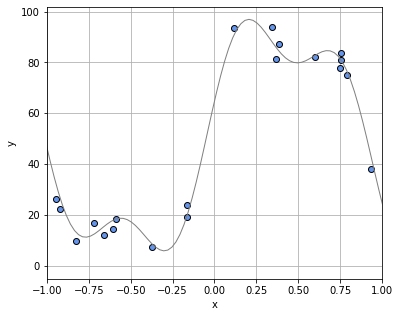

In [ ]:
# データを発生させる

functype = 4   # 真の関数の種類

n = 20    # データの個数
X_min = -1  # X の下限
X_max = 1  # X の上限

sigma = 5   # 目的変数に乗せるノイズ（平均0の正規分布に従う観測雑音）の標準偏差

X, Y, xt, yt = create_data(functype, n, X_min, X_max, sigma)

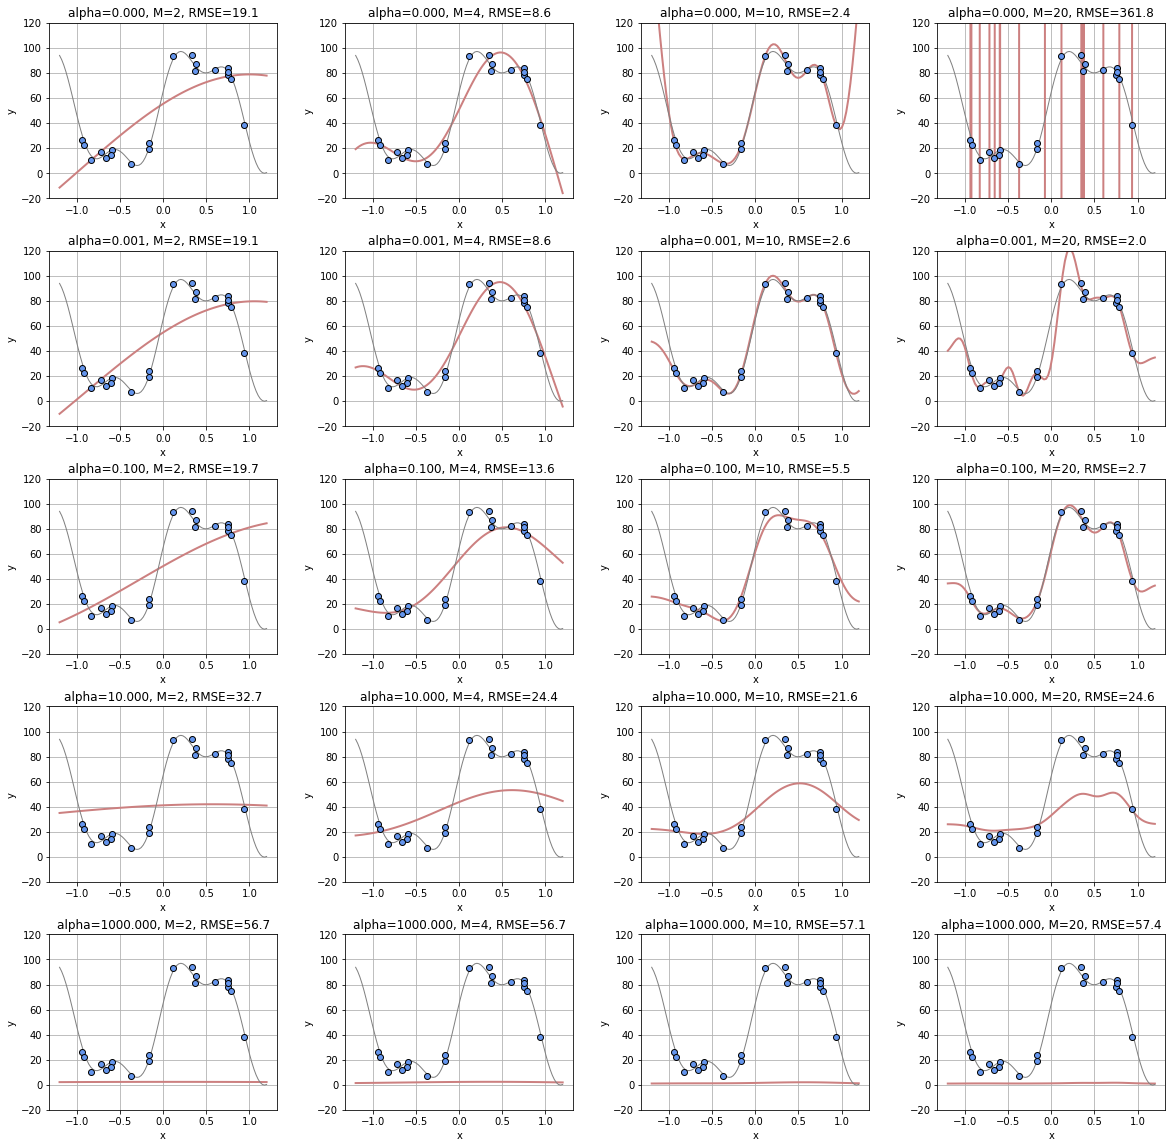

In [ ]:
# モデルの複雑さ（パラメータの数：基底関数の個数）をさまざまに変えて結果の違いをみてみる
# さらに正則化最小二乗法の正則化パラメータもさまざまに変えてみる

# 試したい基底関数の個数をリストで与える
M = [2, 4, 10, 20]

# 正則化パラメータ（試したい値をリストで与える）
Alpha = [0, 0.001, 0.1, 10, 1000]

# 指定したalpha, Mそれぞれについてグラフを描画
plt.figure(figsize=(20, 20))
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)

for j, alpha in enumerate(Alpha):
    for i in range(len(M)):
        plt.subplot(len(Alpha), len(M), j*len(M)+i+1)
        W = fit_l2_gauss_func(X, Y, M[i], alpha)
        show_gauss_func(W)
        Y_pred = gauss_lr_output(W, X)

        mse = calc_mse(Y, Y_pred)

        plt.plot(xt, yt, color=(0.5, 0.5, 0.5), linewidth=1)   # 参考として真の関数を重ねて描く
        plt.plot(X, Y, marker='o', linestyle='None', 
                color='cornflowerblue', markeredgecolor='black')
        plt.ylim(-20, 120)  # 縦軸の表示範囲を設定しておきます（y方向に値が発散する場合があるため）
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid(True)
        plt.title("alpha={0:.3f}, M={1:d}, RMSE={2:.1f}".format(alpha, M[i], np.sqrt(mse)))

plt.show()

# 3　教師あり学習の補足(2)：特徴量の重要度を算出

ランダムフォレストでは，説明変数（特徴量）の重要度を算出できる

In [ ]:
# ランダムフォレスト（分類）

from sklearn.ensemble import RandomForestClassifier as RFC

rfc = RFC(n_estimators=5, random_state=1)
 
rfc.fit(train_x,train_y)
pred_y = rfc.predict(test_x)

from sklearn import metrics
cm = metrics.confusion_matrix(test_y, pred_y) # 混同行列
acc = metrics.accuracy_score(test_y, pred_y) # Accuracy
cr = metrics.classification_report(test_y, pred_y) # 各種評価指標をまとめて表示
print('Confusion matrix:\n', cm)
print('Accuracy:', acc)
print('Classification Report:\n', cr)

# Feature Importance（特徴量の重要度）
fti = rfc.feature_importances_

print("\nFeature Importances:")
for i in range(len(feature_names)-1):
    print('{0:3s} : {1:>.6f}'.format(feature_names[i], fti[i]))

Confusion matrix:
 [[66  4]
 [18 85]]
Accuracy: 0.8728323699421965
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        70
           1       0.96      0.83      0.89       103

    accuracy                           0.87       173
   macro avg       0.87      0.88      0.87       173
weighted avg       0.89      0.87      0.87       173


Feature Importances:
A01 : 0.014164
A02 : 0.070374
A03 : 0.067161
A04 : 0.017512
A05 : 0.020547
A06 : 0.044087
A07 : 0.020366
A08 : 0.114833
A09 : 0.296049
A10 : 0.062251
A11 : 0.091153
A12 : 0.011901
A13 : 0.007558
A14 : 0.081560
A15 : 0.080483


In [ ]:
# ランダムフォレスト回帰

from sklearn.ensemble import RandomForestRegressor as RFR

rfr = RFR(n_jobs=-1, random_state=1)
 
rfr.fit(train_reg_x,train_reg_y)
pred_reg_y = rfr.predict(test_reg_x)
print("決定係数", rfr.score(test_reg_x, test_reg_y))

# Feature Importance（特徴量の重要度）
fti_reg = rfr.feature_importances_

print("\nFeature Importances:")
for i in range(len(feature_names_reg)-2):
    print('{0:30s} : {1:>.6f}'.format(feature_names_reg[i+2], fti_reg[i]))

決定係数 0.614747800525907

Feature Importances:
malic_acid                     : 0.044084
ash                            : 0.042250
alcalinity_of_ash              : 0.030601
magnesium                      : 0.020157
total_phenols                  : 0.065278
flavanoids                     : 0.033208
nonflavanoid_phenols           : 0.017474
proanthocyanins                : 0.050323
color_intensity                : 0.441351
hue                            : 0.038693
od280/od315_of_diluted_wines   : 0.025959
proline                        : 0.190621
